# Population Growth Predictor
#### TASK: Given a year, the population growth predictor is tasked with performing, and comparing, both linear and polynomial regression to estimate/predict the population size for a given year.

## Import Modules
#### pandas: Python sublibrary used to facilitate data analysis and machine learning tasks
#### numpy: Python sublibrary that provides support for work with large, multi-dimensional arrays and matrices
#### matplotlib: Python sublibrary that facilitates graphical visualization of data.
#### sklearn: Python sublibrary that provides tools for statistical modeling and machine learning tasks

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score

## Read in Data

In [236]:
worldpop = pd.read_csv('WorldPopulation.csv')
print(worldpop.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54208.0      55434.0      56234.0      56699.0      57029.0   
1  130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   
2    8996967.0    9169406.0    9351442.0    9543200.0    9744772.0   
3   96396419.0   98407221.0  100506960.0  102691339.0  104953470.0   
4    5454938.0    5531451.0    5608499.0    5679409.0    5734995.0   

          1965  ...         2013         2014         2015         2016  \
0      57357.0  .

## Analyze the Data

In [237]:
worldpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

## Create Single Country DataFrame

In [238]:
# Create df
country = input('Enter country name: ') #country = "United Kingdom"
country_data = worldpop.loc[worldpop['Country Name']==country]

# Drop all labels except for year columns
country_data = country_data.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Drop all NaN values
country_data.dropna(axis=1, inplace=True)

# Take the transpose (flip df)
country_data = country_data.T

print(country_data.head())

Enter country name: United Kingdom
              81
1960  52400000.0
1961  52800000.0
1962  53250000.0
1963  53650000.0
1964  54000000.0


In [239]:
# Rename indices
country_index = worldpop.index[worldpop['Country Name']==country].values
country_data = country_data.reset_index().rename(columns={'index':'year', country_index[0]:'population'})

print(country_data.head())

   year  population
0  1960  52400000.0
1  1961  52800000.0
2  1962  53250000.0
3  1963  53650000.0
4  1964  54000000.0


## Assign x and y variables

In [240]:
# Equate x to only yearly values
# Reshape nparray to be of a tbd # of rows and only one col
x = country_data.iloc[:, 0].values.reshape(-1,1)
x = x.astype(np.int64)
print("x values:\n", x[0:5,:], "\n  ...")

# Equate y to only population valuess
# Reshape nparray to be of a tbd # of rows and only one col
y = country_data.iloc[:, 1].values.reshape(-1,1)
y = y.astype(np.int64)
print("y values:\n", y[0:5,:], "\n  ...")

x values:
 [[1960]
 [1961]
 [1962]
 [1963]
 [1964]] 
  ...
y values:
 [[52400000]
 [52800000]
 [53250000]
 [53650000]
 [54000000]] 
  ...


## Graph Data

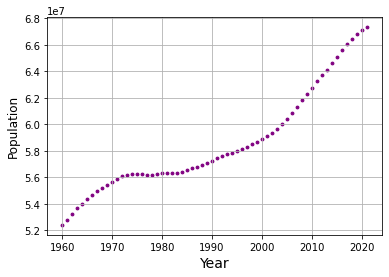

In [241]:
# Plotting Data Points
plt.scatter(x, y, s=8, color='purple')

# Graph Formatting
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=12)
plt.grid(True)
plt.show()

## Train/Test Split Data

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(49, 1) (13, 1) (49, 1) (13, 1)


## Train and Predict Data

In [243]:
# Train Linear Regression Model
linr_model = LinearRegression().fit(x_train, y_train)

# Train Polynomial Regression Model 
# - transform x values to expand over all possible combinations 
#   of x features less than or equal to the (3rd) degree
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression().fit(x_train_poly, y_train)

# Observing polynomial features generation
# print(f"Data from x training set:\n{x_train[0:5,:]}")
# print(f"Data from transformed x training set:\n{x_train_poly[0:5, :].astype(np.int64)}")

## Predict Data

In [244]:
# Predict Data using Linear Regression model
y_train_linr_pred = linr_model.predict(x_train)
# Predict on unknown testing data set
y_test_linr_pred = linr_model.predict(x_test)

# Predict Data using Polynomial Regression model
y_train_poly_pred = poly_model.predict(x_train_poly)
# Predict on unknown testing data set
y_test_poly_pred = poly_model.predict(x_test_poly)

## Compare Actual and Predicted Values

In [245]:
# Compare training data sets
train_compare = pd.DataFrame({'Year': x_train.flatten(), 'Actual': y_train.flatten(), \
                        'Predicted (LR)': y_train_linr_pred.astype(np.int64).flatten(), \
                        'Predicted (PR)': y_train_poly_pred.astype(np.int64).flatten()})
print(train_compare.head(10))

   Year    Actual  Predicted (LR)  Predicted (PR)
0  2015  65116219        63789613        64722204
1  2007  61322463        62150362        61118294
2  1963  53650000        53134481        53854093
3  2000  58892514        60716017        59103119
4  1987  56802050        58052234        57126101
5  1970  55663250        54568826        55274197
6  2014  64602298        63584707        64181657
7  1979  56246951        56412983        56369787
8  1991  57424897        58871860        57573287
9  2018  66460344        64404332        66517328


In [246]:
# Compare testing data sets
test_compare = pd.DataFrame({'Year': x_test.flatten(), 'Actual': y_test.flatten(), \
                        'Predicted (LR)': y_test_linr_pred.astype(np.int64).flatten(), \
                        'Predicted (PR)': y_test_poly_pred.astype(np.int64).flatten()})
print(test_compare.head(10))

   Year    Actual  Predicted (LR)  Predicted (PR)
0  1981  56333829        56822796        56558967
1  2012  63700215        63174894        63182094
2  1998  58487141        60306204        58678219
3  1984  56422072        57437515        56836101
4  1962  53250000        52929574        53590979
5  2001  59119673        60920924        59338109
6  2020  67081000        64814145        67867324
7  2010  62766365        62765081        62285456
8  1995  58019030        59691485        58140552
9  2004  59987905        61535643        60143656


## Make Individual Prediction

In [247]:
year = int(input("Enter year(1960-) for prediction: "))

# With Linear Regression
linr_pred = linr_model.predict([[year]]) # y = (coef_)x + (intercept_)
linr_pred = round(linr_pred[0,0])
print(f"Predicted population in {year} using Linear Regression model: {'{:,}'.format(linr_pred)}")

# With Polynomial Regression
poly_pred = poly_model.predict(poly.transform([[year]]))
poly_pred = round(poly_pred[0,0])
print(f"Predicted population in {year} using Polynomial Regression model: {'{:,}'.format(poly_pred)}")

Enter year(1960-) for prediction: 2020
Predicted population in 2020 using Linear Regression model: 64,814,146
Predicted population in 2020 using Polynomial Regression model: 67,867,324


## Graph Regression Line

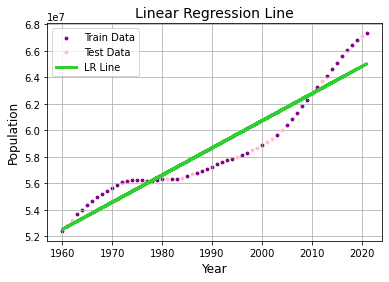

In [248]:
# Plotting Data Points
plt.scatter(x_train, y_train, s=8, color='purple', label='Train Data')
plt.plot(x_test, y_test, '.', color='pink', label='Test Data')

# Plotting Linear Regression Line
plt.plot(x_train, y_train_linr_pred, color='limegreen', lw=3, label='LR Line')

# Graph Formatting
plt.title('Linear Regression Line', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

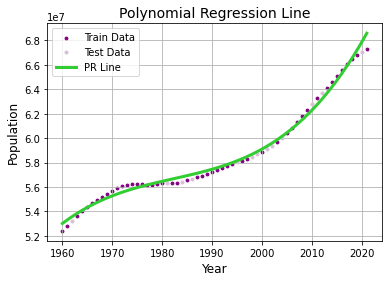

In [249]:
# Plotting Data Points 
plt.scatter(x_train, y_train, s=8, color='purple', label='Train Data')
plt.plot(x_test, y_test, '.', color='thistle', label='Test Data')

# Plotting Polynomial Regression Line
line = np.linspace(x_train.min(), x_train.max(), np.size(x_train, 0)).reshape(-1,1)
poly_line = poly.transform(line)
plt.plot(line, poly_model.predict(poly_line), color='limegreen', lw=3, label='PR Line')

# Graph Formatting
plt.title('Polynomial Regression Line', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Get Regression Line Slope and y-Intercept Values

In [250]:
# Linear Regression
print(f"Linear Regression coefficient: {linr_model.coef_[0,0]}")
print(f"Linear Regression intercept: {linr_model.intercept_[0]}")
   
# Polynomial Regression
print(f"\nPolynomial Regression coefficients: {poly_model.coef_[0,0:5]}")
print(f"Polynomial Regression intercept: {poly_model.intercept_[0]}")

Linear Regression coefficient: 204906.3916904614
Linear Regression intercept: -349096765.6117816

Polynomial Regression coefficients: [ 0.00000000e+00  1.70541301e+09 -8.60251018e+05  1.44651521e+02]
Polynomial Regression intercept: -1126975015128.3945


## Make Individual Predictions

## Run Accuracy Analysis

In [251]:
# Calculate R-Squared Score Sans Cross Validation

# Linear Regression 
linr_r2 = r2_score(y_train, y_train_linr_pred)
print(f"Linear Regression r2 score: {linr_r2:.4f}")

# Polynomial Regression
poly_r2 = r2_score(y_train, y_train_poly_pred)
print(f"Polynomial Regression r2 score: {poly_r2:.4f}")

# Calculate RMSE Score Sans Cross Validation

# Linear Regression
linr_rmse = mean_squared_error(y_train, y_train_linr_pred, squared=False)
print(f"Linear Regression RMSE score: {linr_rmse:.4f}")

# Polynomial Regression
poly_rmse = mean_squared_error(y_train, y_train_poly_pred, squared=False)
print(f"Polynomial Regression RMSE score: {poly_rmse:.4f}")

Linear Regression r2 score: 0.9067
Polynomial Regression r2 score: 0.9921
Linear Regression RMSE score: 1205167.7465
Polynomial Regression RMSE score: 350867.2897


In [252]:
# Calculate Cross Validation Repeated K-fold R-Squared Scores

# Linear Regression
linr_kfold_scores_r2 = cross_val_score(linr_model, x_train, y_train, scoring='r2', \
                                       cv=RepeatedKFold(n_splits=5, n_repeats=5))
print(f"Linear Regression K-fold r2 scores:\n{linr_kfold_scores_r2}")

# Polynomial Regression
poly_kfold_scores_r2 = cross_val_score(poly_model, x_train_poly, y_train, scoring='r2', \
                                       cv=RepeatedKFold(n_splits=5, n_repeats=5))
print(f"\nPolynomial Regression K-fold r2 scores:\n{poly_kfold_scores_r2}")

Linear Regression K-fold r2 scores:
[0.89186961 0.92693585 0.88014267 0.84802406 0.9164015  0.90955971
 0.84530232 0.9117944  0.87965659 0.90428556 0.81034596 0.91839347
 0.89615146 0.91914332 0.89342634 0.84900384 0.8819698  0.91502662
 0.75526643 0.73582003 0.90080678 0.84407537 0.86222039 0.89681869
 0.92413222]

Polynomial Regression K-fold r2 scores:
[0.98196117 0.99412684 0.9708216  0.99676366 0.98835996 0.99193265
 0.99189918 0.97325939 0.98817943 0.99028571 0.99397618 0.98721097
 0.98879496 0.96228861 0.98954375 0.98520402 0.99316489 0.99283775
 0.97780834 0.99132341 0.99260666 0.98070938 0.98791749 0.9902087
 0.99585468]


In [253]:
# Calculate mean and variability of the calculated K-fold R-Squared Scores

# Linear Regression
linr_cv_score_r2 = np.mean(linr_kfold_scores_r2)
print(f"Linear Regression Cross Validated R-Square Score: {linr_cv_score_r2:.4f}")
linr_cv_score_std_r2 = np.std(linr_kfold_scores_r2)
print(f"Linear Regression Cross Validation Score Variability: {linr_cv_score_std_r2:.4f}")

# Polynomial Regression
poly_cv_score_r2 = np.mean(poly_kfold_scores_r2)
print(f"\nPolynomial Regression Cross Validated R-Square Score: {poly_cv_score_r2:.4f}")
poly_cv_score_std_r2 = np.std(poly_kfold_scores_r2)
print(f"Polynomial Regression Cross Validation Score Variability: {poly_cv_score_std_r2:.4f}")

Linear Regression Cross Validated R-Square Score: 0.8767
Linear Regression Cross Validation Score Variability: 0.0487

Polynomial Regression Cross Validated R-Square Score: 0.9871
Polynomial Regression Cross Validation Score Variability: 0.0082


In [254]:
# Calculate Cross Validation Repeated K-fold RMSE Scores

# Linear Regression
linr_kfold_scores_rmse = cross_val_score(linr_model, x_train, y_train, scoring='neg_mean_squared_error', \
                                         cv=RepeatedKFold(n_splits=5, n_repeats=5))
linr_kfold_scores_rmse = np.sqrt(np.abs(linr_kfold_scores_rmse))
print(f"Linear Regression K-fold RMSE scores:\n{linr_kfold_scores_rmse}")

# Polynomial Regression
poly_kfold_scores_rmse = cross_val_score(poly_model, x_train_poly, y_train, scoring='neg_mean_squared_error', \
                                         cv=RepeatedKFold(n_splits=5, n_repeats=5))
poly_kfold_scores_rmse = np.sqrt(np.abs(poly_kfold_scores_rmse))
print(f"\nPolynomial Regression K-fold scores:\n{poly_kfold_scores_rmse}")

Linear Regression K-fold RMSE scores:
[1520972.32301869 1439125.30489277 1132112.69154731 1375368.38056024
 1097511.87486823 1336642.72938474 1219813.60158289 1453717.34390111
 1212715.0113286   945050.76917943 1252821.4811904  1250258.99970003
 1328811.02409047 1144647.36868799 1340351.05318843 1054835.65605265
 1373927.57775671 1405193.89553901 1092683.47384907 1411060.85422503
 1028193.18732702 1339801.72486501 1091592.94117919 1514836.93975731
 1206094.7072031 ]

Polynomial Regression K-fold scores:
[619082.42922527 397652.33967776 307233.4428683  362791.92997517
 213348.11895416 266991.19921154 319363.31463396 624002.26101508
 384916.07391629 361339.86794663 616189.23176966 345136.58752207
 311204.10641973 282449.83128878 696336.52358122 615859.25187944
 356657.43759762 535534.4856036  332436.77547649 283215.70663578
 321992.11206552 271154.47661087 368528.32938354 362573.82262786
 838658.11271819]


In [255]:
# Calculate mean and variability of the calculated K-fold RMSE Scores

# Linear Regression
linr_cv_score_rmse = np.mean(linr_kfold_scores_rmse)
print(f"Linear Regression Cross Validated RMSE Score: {linr_cv_score_rmse:.4f}")
linr_cv_score_std_rmse = np.std(linr_kfold_scores_rmse)
print(f"Linear Regression Cross Validation Score Variability: {linr_cv_score_std_rmse:.4f}")

# Polynomial Regression
poly_cv_score_rmse = np.mean(poly_kfold_scores_rmse)
print(f"Polynomial Regression Cross Validated RMSE Score: {poly_cv_score_rmse:.4f}")
poly_cv_score_std_rmse = np.std(poly_kfold_scores_rmse)
print(f"Polynomial Regression Cross Validation Score Variability: {poly_cv_score_std_rmse:.4f}")

Linear Regression Cross Validated RMSE Score: 1262725.6366
Linear Regression Cross Validation Score Variability: 156261.4520
Polynomial Regression Cross Validated RMSE Score: 415785.9107
Polynomial Regression Cross Validation Score Variability: 158051.3396
